# Analysis of full frame calcium signals. 
* 3/26/2024 setup

In [45]:
from os.path import join
from os import walk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from ydata_profiling import ProfileReport
# from src import eeg_class as ec
from src import full_frame_analysis as ffa
from src.classes import database

In [2]:
%matplotlib inline

In [3]:
db = database.ExperimentDatabase()

In [4]:
trials = [745, 740, 749, 762, 761, 760, 885, 890]

In [ ]:
# Pairing Tseries path with trial id
# database.pair_imaging_data(
#     "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC2-004",
#     trial_id=760,
# )
# for trial in trials:
#     print(database.fetch_trial(trial)["tSeries_path"])

In [36]:
somatic_data = []
for trial in trials:
    for dir, subdir, subdirs in walk(database.fetch_trial(trial)["tSeries_path"]):
        # print(subdirs)
        if "reg_tif" in subdir:
            somatic_data.append(join(dir, "reg_tif"))    

In [42]:
somatic_data

['/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003/TSeries-07072021-0833_GC2-003_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif',
 '/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC1-002/TSeries-07072021-0833_MC1-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif',
 '/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC2-004/TSeries-07072021-0833_MC2-004_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif',
 '/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_GC-001/TSeries-07062021-0844_GC-001_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif',
 '/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC-002/TSeries-07062021-0844_MC-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif',
 '/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC2-004/TSeries-07062021-0844_MC2-004_Cycle0000

In [41]:
somatic_data[0]

'/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003/TSeries-07072021-0833_GC2-003_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif'

In [3]:
somatic_data = [
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003/TSeries-07072021-0833_GC2-003_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC1-002/TSeries-07072021-0833_MC1-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC2-004/TSeries-07072021-0833_MC2-004_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_GC-001/TSeries-07062021-0844_GC-001_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC-002/TSeries-07062021-0844_MC-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC2-004/TSeries-07062021-0844_MC2-004_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_1/4_3_SD/TSeries-04032023-1323_SD_sess1-001/TSeries-04032023-1323_SD_sess1-001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_1/4_3_SD/TSeries-04032023-1323_SD_sess1-001/TSeries-04032023-1323_SD_sess1-001.sima/s2p_ff/suite2p/plane1/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_5/4_3_SD/TSeries-04032023-1323-001/TSeries-04032023-1323-001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_5/4_3_SD/TSeries-04032023-1323-001/TSeries-04032023-1323-001.sima/s2p_ff/suite2p/plane1/reg_tif/",
]

In [ ]:
dendritic_data = []
# this has been ff registered, but need the eeg data (if exists)

In [ ]:
# ProfileReport(raw_ff_data, title="Profiling Report")

In [39]:
def open_and_convert(path):
    raw_ff_data = pd.read_csv(join(path, "ff_data.csv"))
    return raw_ff_data.convert_dtypes()

In [51]:
# bandpass filter parameters
lowcut = 0.01
highcut = 0.035
fs = 10.0

# power calculation
window_size = 64  # Number of samples in each window for calculating power
step_size = 32  # Step size for moving the window

somatic_power = {
    "path": [],
    "non_nrem_power": [],
    "nrem_power": [],
}

for path in somatic_data:
    raw_ff_data = open_and_convert(path)
    raw_ff_data["Padded_Filtered_DeltaF_F"] = ffa.bandpass_filter_with_padding(
        raw_ff_data["DeltaF_F"], lowcut, highcut, fs, order=3, pad_length=500
    )

    times, power = ffa.calculate_power_over_time(
        raw_ff_data["Padded_Filtered_DeltaF_F"].to_numpy(),
        window_size,
        step_size,
        padding_type="symmetric",
    )

    nrem_int = raw_ff_data["NREM"].astype(int)
    downsampled_NREM = ffa.downsample_boolean_signal(nrem_int, len(power))
    non_nrem_power = np.mean(power[~downsampled_NREM] ** 2)
    nrem_power = np.mean(power[downsampled_NREM] ** 2)

    somatic_power["path"].append(path)
    somatic_power["non_nrem_power"].append(non_nrem_power)
    somatic_power["nrem_power"].append(nrem_power)

df_somatic_power = pd.DataFrame(somatic_power)

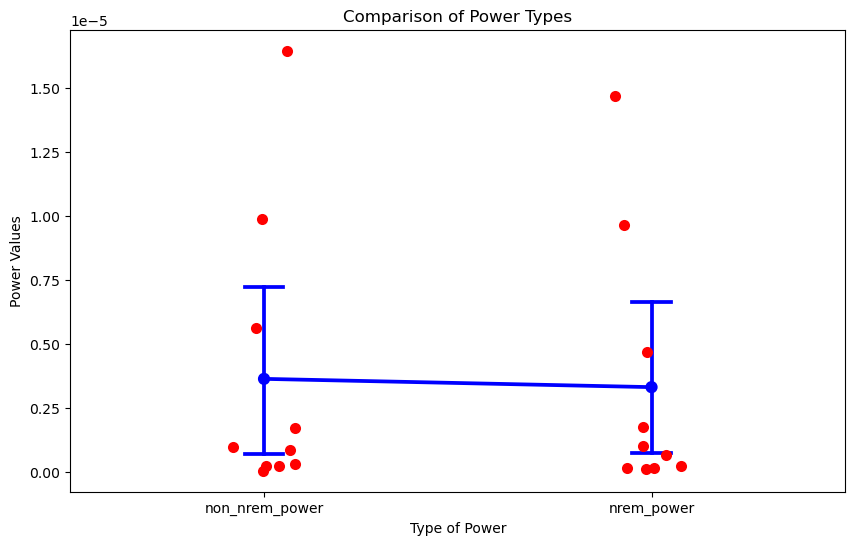

In [57]:
df_long = pd.melt(
    df_somatic_power,
    id_vars=["path"],
    value_vars=["non_nrem_power", "nrem_power"],
    var_name="Power_Type",
    value_name="Value",
)
df_long

# Set up a larger plot
plt.figure(figsize=(10, 6))

# Create a pointplot
sns.pointplot(data=df_long, x="Power_Type", y="Value", color="blue", capsize=0.1)

# Overlay with a stripplot for individual data point visibility
sns.stripplot(data=df_long, x="Power_Type", y="Value", color="red", size=8, jitter=True)

# Adding titles and labels
plt.title("Comparison of Power Types")
plt.xlabel("Type of Power")
plt.ylabel("Power Values")

# Show the plot
plt.show()

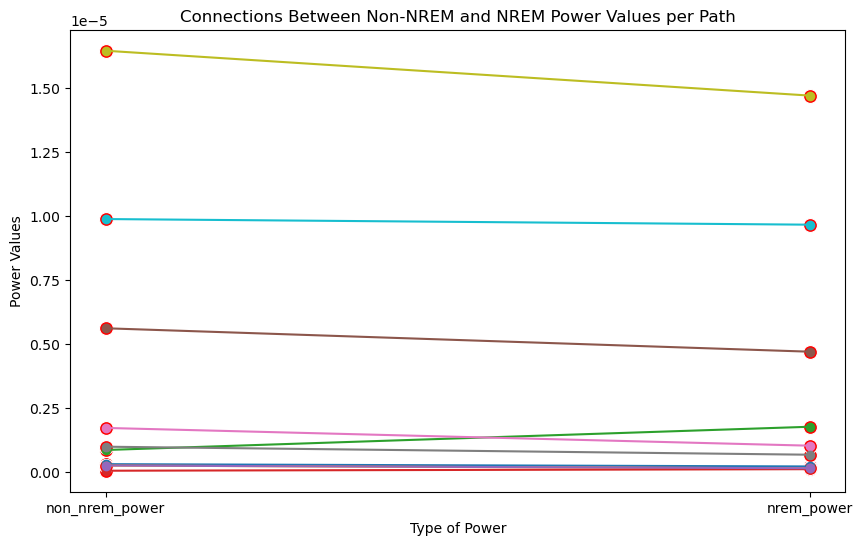

In [62]:
# Create a pivot to have non_nrem and nrem powers side by side for each path
df_pivot = df_long.pivot(index="path", columns="Power_Type", values="Value")
df_pivot.reset_index(inplace=True)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting each path's non_nrem and nrem power
for index, row in df_pivot.iterrows():
    plt.plot(
        ["non_nrem_power", "nrem_power"],
        [row["non_nrem_power"], row["nrem_power"]],
        marker="o",
    )

# Adding scatter for visual emphasis on points
sns.scatterplot(data=df_long, x="Power_Type", y="Value", color="red", s=100)

# Adding titles and labels
plt.title("Connections Between Non-NREM and NREM Power Values per Path")
plt.xlabel("Type of Power")
plt.ylabel("Power Values")

# Show the plot
plt.show()

## Plotting functions 
these work with a single dataset

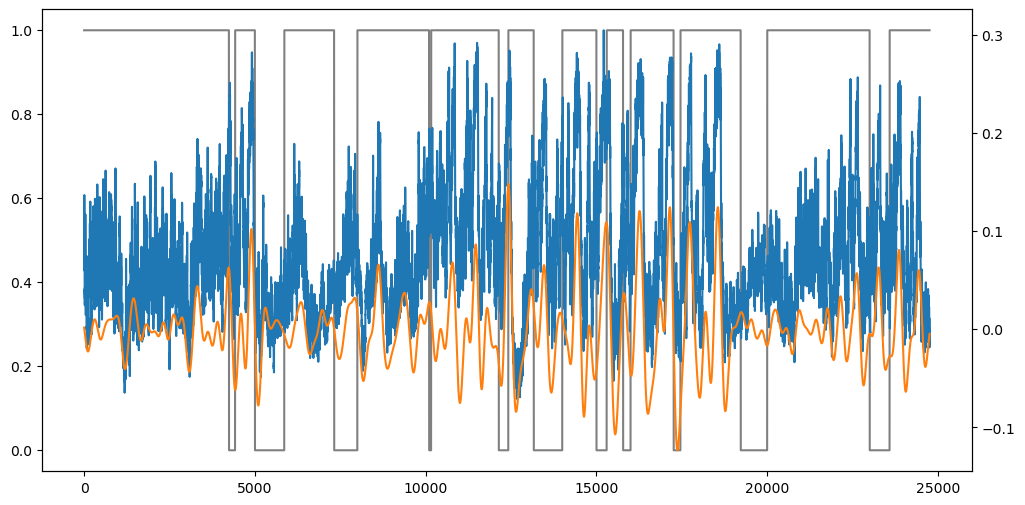

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(
    raw_ff_data["SequenceIndex"],
    raw_ff_data["NREM"],
    label="NREM Sleep Stage",
    color="grey",
)
ax2 = ax1.twinx()
ax2.plot(raw_ff_data["SequenceIndex"], raw_ff_data["DeltaF_F"])
ax2.plot(raw_ff_data["SequenceIndex"], raw_ff_data["Padded_Filtered_DeltaF_F"])

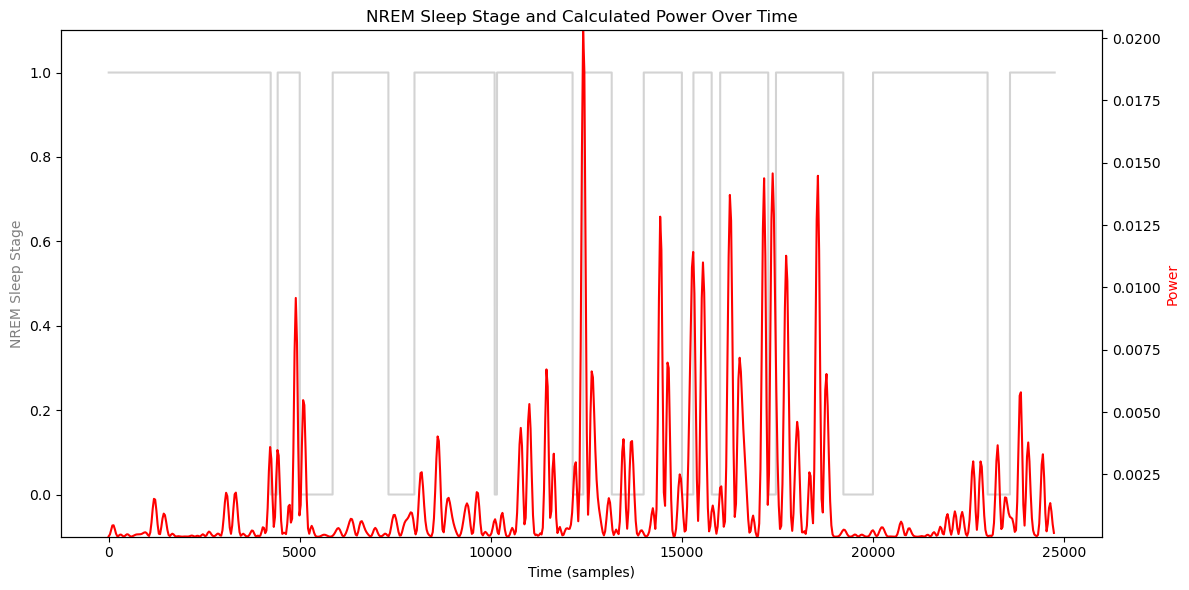

In [13]:
nrem_int = raw_ff_data["NREM"].astype(int)

total_duration = len(
    raw_ff_data["NREM"]
)  # This could be adjusted based on actual time duration or sampling rate
x_nrem = np.linspace(0, total_duration, len(nrem_int))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NREM data
ax1.plot(x_nrem, nrem_int, label="NREM Sleep Stage", color="lightgrey")

# Assume 'powers' are related to the 'times', plotting as scatter for visual emphasis
ax2 = ax1.twinx()  # Create a second y-axis to plot powers
ax2.plot(times, power, color="red", label="Power over Time")

# Labels and titles
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("NREM Sleep Stage", color="grey")
ax2.set_ylabel("Power", color="red")
ax1.set_title("NREM Sleep Stage and Calculated Power Over Time")
ax1.set_ylim(-0.1, 1.1)  # Adjust NREM plot limits for better visibility
ax2.set_ylim([min(power), max(power)])  # Optional: adjust based on your data

# Show plot
fig.tight_layout()  # Adjust layout to make room for the legend
plt.show()